<a href="https://colab.research.google.com/github/iPoetDev/ibm-skills-ai-colab-sessions/blob/main/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression


---


### NumPy, short for "Numerical Python," is a powerful library used in Python programming for numerical and scientific computing. It's like a supercharged version of Python's built-in list data structure, designed to handle large amounts of data more efficiently.

### Matplotlib is a powerful library in Python used for creating visualizations, such as graphs and charts. It’s particularly useful for data scientists, engineers, and anyone who needs to visualize data to understand and communicate trends, patterns, and insights.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate some data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
print(X.shape)


(100, 1)


In [4]:
# Linear Regression implementation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Best parameters (theta):", theta_best)

Best parameters (theta): [[4.22215108]
 [2.96846751]]


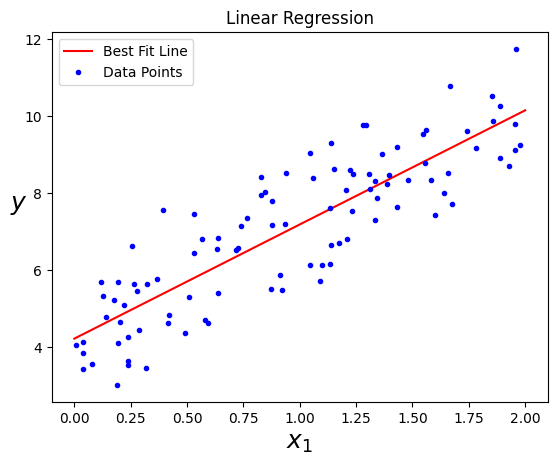

In [5]:
# Predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-", label="Best Fit Line")
plt.plot(X, y, "b.", label="Data Points")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Linear Regression")
plt.legend()
plt.show()


# Classification with Scikit-learn

### Scikit-learn is a popular Python library for machine learning, offering simple and efficient tools for data analysis and modeling. It provides a wide range of algorithms for classification, regression, clustering, and dimensionality reduction. The library integrates well with other scientific libraries like NumPy and pandas, making it easy to build and evaluate machine learning models. Scikit-learn is widely used for its ease of use, comprehensive documentation, and versatility in handling different machine learning tasks.

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


### iris is a dataset included in the Sckikit-learn library. Used frequently for beginner's introduction.


*   150 samples from three species of Iris flowers
*   Each sample has four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters



In [7]:
# Load dataset
iris = load_iris()
X = iris["data"][:, 3:]  # petal width
# Use the built-in 'int' instead of 'np.int'
y = (iris["target"] == 2).astype(int)  # Iris-Virginica

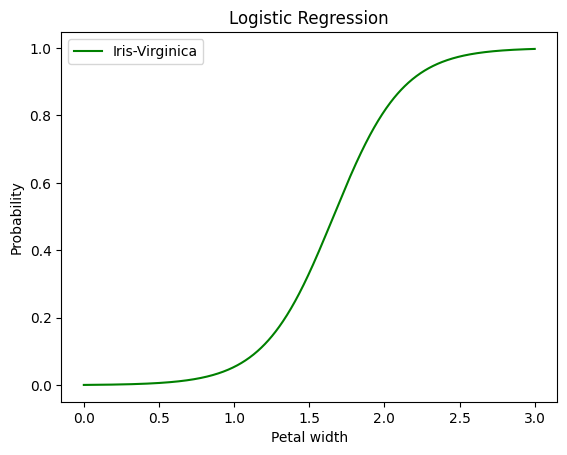

In [8]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.legend()
plt.title("Logistic Regression")
plt.show()

# Clustering

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Generate some data
X = np.random.rand(100, 2)

## K-Mean Clusering


---


### Imagine you have a big jar of different types of candies, and you want to sort them into separate groups based on their colors. K-Means Clustering is like a smart way of sorting candies into different groups.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


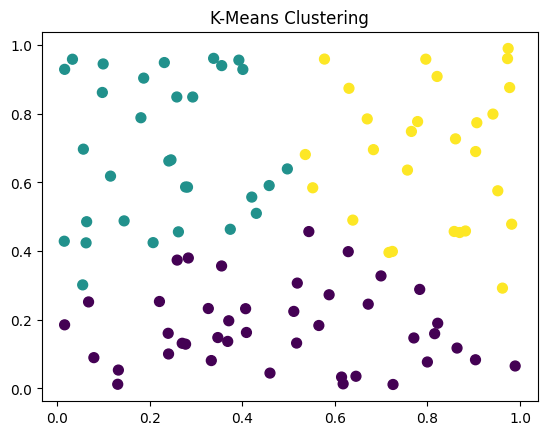

In [11]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

## Hierarchical Clustering


---


### Imagine you have a big box of mixed Lego pieces, and you want to organize them into groups based on their shapes and colors. Hierarchical Clustering is like a way of organizing these Lego pieces step by step, either by starting small and building up or starting big and breaking down.


*   Agglomerative (Bottom-up) - Starting small, think of this as starting with one Lego piece as its own group
*   Divisive (Top-down) - Starting big, think of this as starting with the whole box of Lego pieces as one big group

*Note: Scikit-learn does not have built-in implementation for divisive clustering (possibly use SciPy)*



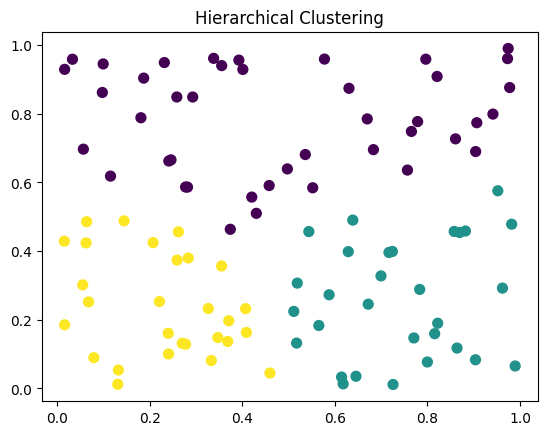

In [12]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
y_hc = hc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()



## DBSCAN


---


### Imagine you’re in a playground filled with different groups of kids playing different games, and you want to figure out who is playing with whom. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is like a smart way of finding these groups based on how close the kids are to each other and how many kids are nearby.

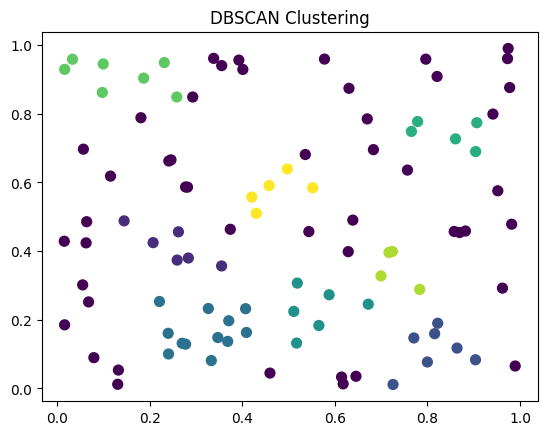

In [13]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.1)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


# Recommender Systems

In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


In [15]:
# Sample data
data = {'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 4],
        'item_id': [1, 2, 3, 2, 3, 1, 4, 2, 3, 4],
        'rating': [5, 4, 3, 5, 4, 4, 5, 5, 4, 4]}
df = pd.DataFrame(data)

Print Panda DataFrame for User ID to Item ID by Rating.

In [22]:
print(df)

   user_id  item_id  rating
0        1        1       5
1        1        2       4
2        1        3       3
3        2        2       5
4        2        3       4
5        3        1       4
6        3        4       5
7        4        2       5
8        4        3       4
9        4        4       4


In [16]:
# Create user-item matrix
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating')

In [17]:
print("User-Item Matrix:\n", user_item_matrix)

User-Item Matrix:
 item_id    1    2    3    4
user_id                    
1        5.0  4.0  3.0  NaN
2        NaN  5.0  4.0  NaN
3        4.0  NaN  NaN  5.0
4        NaN  5.0  4.0  4.0


In [18]:
# Fill NaN with 0
user_item_matrix = user_item_matrix.fillna(0)

In [19]:
print("User-Item Matrix with NaN filled with 0:\n", user_item_matrix)

User-Item Matrix with NaN filled with 0:
 item_id    1    2    3    4
user_id                    
1        5.0  4.0  3.0  0.0
2        0.0  5.0  4.0  0.0
3        4.0  0.0  0.0  5.0
4        0.0  5.0  4.0  4.0


In [20]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(user_item_matrix)

print("User-User Similarity Matrix:\n", similarity_matrix)

User-User Similarity Matrix:
 [[1.         0.70676177 0.4417261  0.59941492]
 [0.70676177 1.         0.         0.84811452]
 [0.4417261  0.         1.         0.4137144 ]
 [0.59941492 0.84811452 0.4137144  1.        ]]


In [21]:
# Recommend items to user 1
user_index = 0
user_similarities = similarity_matrix[user_index]
similar_users = user_similarities.argsort()[::-1][1:]  # exclude the user itself

recommended_items = user_item_matrix.iloc[similar_users].mean(axis=0)
recommended_items = recommended_items.sort_values(ascending=False)
print("Recommended items for user 1:\n", recommended_items)

Recommended items for user 1:
 item_id
2    3.333333
4    3.000000
3    2.666667
1    1.333333
dtype: float64
